In [1]:
# Packages laden
import numpy as np
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Input, Dense
from matplotlib import pyplot as plt
from pandas import DataFrame
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Dropout, Activation, Flatten,TimeDistributed, BatchNormalization, LeakyReLU, Activation 
from keras.models import Model
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Laden der Daten
DATA_FILE="Dropbox/Masterarbeit/Masterarbeit/Datensätze/Geburtenrate/Datensatz.xlsx"
df = pd.read_excel(DATA_FILE)
df=pd.read_excel(DATA_FILE, header=0, parse_dates=[0], index_col='Jahr-Monat',squeeze=True)

In [3]:
# Ein array mit allen Einträgen --> zur besseren Weiterverarbeitung
ZR=df.values

In [4]:
# Anteil der Datensätze am Gesamtdatensatz
ZR_100=ZR
ZR_46=ZR[-400:]

# Unterteilung der Teildatensätze in Trainings-und Testdaten
ZR_100_TR, ZR_100_TE= ZR_100[0:605], ZR_100[605:len(ZR_100)]
ZR_46_TR, ZR_46_TE= ZR_46[0:250], ZR_46[250:len(ZR_46)]

In [5]:
# Funktion: Datensatz erstellen mit Inputs (look_back: Anzahl der verwendten Vergangenheitswerte) + Output (look_forward: 
# Vorhersagehorizont)
def timeseries_to_supervised_R(data, look_back, look_forward):
    df = DataFrame(data)
    columns = [df.shift(look_forward-1+i) for i in range(1, look_back+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    #df = df.drop(0)
    DF=df[::-1]
    df=DF[:len(df)-(look_back+look_forward-1)]
    DF=df[::-1]
    return DF

In [6]:
# Festlegung: look_back, look_forward + Anwendung der Funktion
# Inputneuronen: 12
# Vorhersagehorizont: t+60
look_back=12
look_forward=60

# Inputgröße 100%
# Trainingsdaten
ZR_100_TR_I=timeseries_to_supervised_R(ZR_100_TR, look_back, look_forward)
trainX_100, train_y_100 = ZR_100_TR_I.iloc[:, 0:-1], ZR_100_TR_I.iloc[:, -1]

# Testdaten 
ZR_100_TE_I=timeseries_to_supervised_R(ZR_100_TE, look_back, look_forward)
testX_100, test_y_100 = ZR_100_TE_I.iloc[:, 0:-1], ZR_100_TE_I.iloc[:, -1]


# Inputgröße 46%
# Trainingsdaten
ZR_46_TR_I=timeseries_to_supervised_R(ZR_46_TR, look_back, look_forward)
trainX_46, train_y_46 = ZR_46_TR_I.iloc[:, 0:-1], ZR_46_TR_I.iloc[:, -1]

# Testdaten 
ZR_46_TE_I=timeseries_to_supervised_R(ZR_46_TE, look_back, look_forward)
testX_46, test_y_46 = ZR_46_TE_I.iloc[:, 0:-1], ZR_46_TE_I.iloc[:, -1]

In [23]:
# Replizierbarkeit gewährleisten
np.random.seed(0)

In [24]:
# Modell zusammenbauen
# Dateninput: 100 %
model = Sequential()
model.add(Dense(10, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_100, train_y_100, epochs=200, batch_size=25, verbose=2,validation_data=(testX_100, test_y_100))

Train on 534 samples, validate on 187 samples
Epoch 1/200
 - 1s - loss: 3416119725.0037 - val_loss: 203137338.9947
Epoch 2/200
 - 0s - loss: 282619579.2360 - val_loss: 102585550.4171
Epoch 3/200
 - 0s - loss: 257753443.1461 - val_loss: 83653649.8610
Epoch 4/200
 - 0s - loss: 236522844.1199 - val_loss: 85440355.2086
Epoch 5/200
 - 0s - loss: 231007345.1835 - val_loss: 83500541.0267
Epoch 6/200
 - 0s - loss: 232477164.3596 - val_loss: 84059409.6471
Epoch 7/200
 - 0s - loss: 231096012.2846 - val_loss: 82849356.2567
Epoch 8/200
 - 0s - loss: 229644160.8839 - val_loss: 83424782.2888
Epoch 9/200
 - 0s - loss: 230484852.6592 - val_loss: 81366808.8556
Epoch 10/200
 - 0s - loss: 228001737.0037 - val_loss: 81306137.1765
Epoch 11/200
 - 0s - loss: 225792446.3371 - val_loss: 79915216.7273
Epoch 12/200
 - 0s - loss: 223425455.6404 - val_loss: 79991897.7112
Epoch 13/200
 - 0s - loss: 222266418.8464 - val_loss: 80952855.7433
Epoch 14/200
 - 0s - loss: 222012573.3034 - val_loss: 80560813.7112
Epoch 15

Epoch 121/200
 - 0s - loss: 173776935.7154 - val_loss: 41044911.1818
Epoch 122/200
 - 0s - loss: 187272697.1648 - val_loss: 43778294.3422
Epoch 123/200
 - 0s - loss: 167438534.2472 - val_loss: 40993945.2674
Epoch 124/200
 - 0s - loss: 165171714.5918 - val_loss: 46928456.9091
Epoch 125/200
 - 0s - loss: 171776828.2397 - val_loss: 54904733.3155
Epoch 126/200
 - 0s - loss: 166565543.5955 - val_loss: 41322815.8503
Epoch 127/200
 - 0s - loss: 163798991.7453 - val_loss: 42937981.4492
Epoch 128/200
 - 0s - loss: 164440260.6742 - val_loss: 41456794.8824
Epoch 129/200
 - 0s - loss: 162766939.3708 - val_loss: 45103303.0909
Epoch 130/200
 - 0s - loss: 162641358.4270 - val_loss: 49029452.7540
Epoch 131/200
 - 0s - loss: 171664480.8989 - val_loss: 55574479.8503
Epoch 132/200
 - 0s - loss: 174343709.5281 - val_loss: 39630444.8930
Epoch 133/200
 - 0s - loss: 163642473.0337 - val_loss: 39732000.1337
Epoch 134/200
 - 0s - loss: 166743480.6592 - val_loss: 41000645.6952
Epoch 135/200
 - 0s - loss: 161348

Text(0.5,1,'Loss Curves')

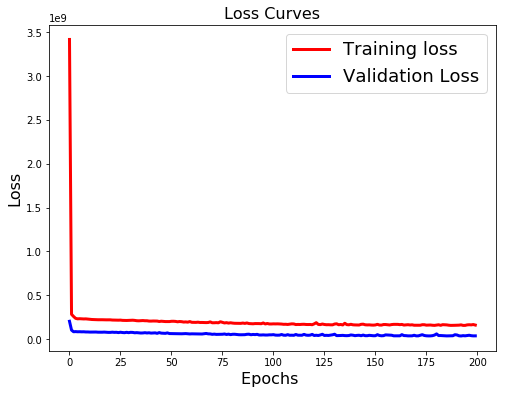

In [25]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [26]:
# Modellperformance bewerten: normalisierte Daten
trainScore = model.evaluate(trainX_100, train_y_100, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_100, test_y_100, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 152878156.31 MSE (12364.39 RMSE)
Test Score: 36944894.33 MSE (6078.23 RMSE)


In [27]:
# Vorhersagen generieren
trainPredict_100 = model.predict(trainX_100)
testPredict_100 = model.predict(testX_100)

In [28]:
# Evaluation
test_MSE=mean_squared_error(test_y_100,testPredict_100)
train_MSE=mean_squared_error(train_y_100,trainPredict_100)

print(test_MSE,train_MSE)

36944893.87977249 152878157.54692882


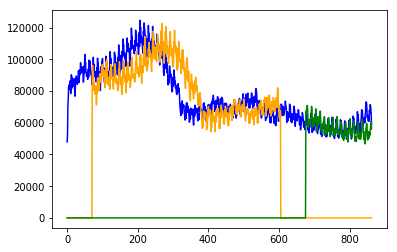

In [29]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_100)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_100))
trainPredictPlot[:]=[0]*len(ZR_100)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_100),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_100)+(look_back+look_forward-1)] = trainPredict_100

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_100)
testPredictPlot=testPredictPlot.reshape(len(ZR_100))
testPredictPlot[:]=[0]*len(ZR_100)
testPredictPlot = testPredictPlot.reshape(len(ZR_100),1)
testPredictPlot[len(trainPredict_100)+2*(look_back+look_forward-1):len(ZR_100)+1] = testPredict_100
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_100, color='blue')
plt.plot(trainPredictPlot, color='orange') 
plt.plot(testPredictPlot, color='green')
plt.show()

In [42]:
# Replizierbarkeit gewährleisten
np.random.seed(7)

In [43]:
# Modell zusammenbauen
# Dateninput: 46 %
model = Sequential()
model.add(Dense(10, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history_reg=model.fit(trainX_46, train_y_46, epochs=200, batch_size=25, verbose=2,validation_data=(testX_46, test_y_46))

Train on 179 samples, validate on 79 samples
Epoch 1/200
 - 1s - loss: 8881331528.9385 - val_loss: 6176805589.8734
Epoch 2/200
 - 0s - loss: 6773603096.3128 - val_loss: 4743842867.8481
Epoch 3/200
 - 0s - loss: 4982668774.2570 - val_loss: 3550595201.6203
Epoch 4/200
 - 0s - loss: 3538222394.6369 - val_loss: 2584082794.9367
Epoch 5/200
 - 0s - loss: 2411550456.1341 - val_loss: 1828457813.8734
Epoch 6/200
 - 0s - loss: 1569679216.9832 - val_loss: 1261166789.6709
Epoch 7/200
 - 0s - loss: 969657603.5754 - val_loss: 851629122.4304
Epoch 8/200
 - 0s - loss: 571930778.4581 - val_loss: 565811159.8987
Epoch 9/200
 - 0s - loss: 318115404.0670 - val_loss: 374079360.0000
Epoch 10/200
 - 0s - loss: 168171260.9609 - val_loss: 251529734.4810
Epoch 11/200
 - 0s - loss: 88003814.9721 - val_loss: 175613660.2025
Epoch 12/200
 - 0s - loss: 50306660.3017 - val_loss: 130678663.1392
Epoch 13/200
 - 0s - loss: 34243030.6369 - val_loss: 104933454.2278
Epoch 14/200
 - 0s - loss: 28361500.5140 - val_loss: 91092

Epoch 122/200
 - 0s - loss: 26582494.9330 - val_loss: 78951055.9747
Epoch 123/200
 - 0s - loss: 26606661.7765 - val_loss: 81194882.8987
Epoch 124/200
 - 0s - loss: 26574233.5866 - val_loss: 82003984.6329
Epoch 125/200
 - 0s - loss: 26555449.7542 - val_loss: 79753871.1013
Epoch 126/200
 - 0s - loss: 26541994.7542 - val_loss: 82197585.1899
Epoch 127/200
 - 0s - loss: 26567508.2123 - val_loss: 82123039.9114
Epoch 128/200
 - 0s - loss: 26567939.6257 - val_loss: 79798691.6456
Epoch 129/200
 - 0s - loss: 26526430.6983 - val_loss: 81561537.7722
Epoch 130/200
 - 0s - loss: 26544381.0503 - val_loss: 82004985.3418
Epoch 131/200
 - 0s - loss: 26585867.6145 - val_loss: 82629006.0633
Epoch 132/200
 - 0s - loss: 26546935.5307 - val_loss: 81445647.7848
Epoch 133/200
 - 0s - loss: 26624462.4022 - val_loss: 79609236.4051
Epoch 134/200
 - 0s - loss: 26534148.5363 - val_loss: 81417450.8354
Epoch 135/200
 - 0s - loss: 26545110.8045 - val_loss: 84796130.8354
Epoch 136/200
 - 0s - loss: 26596052.0838 - val_

Text(0.5,1,'Loss Curves')

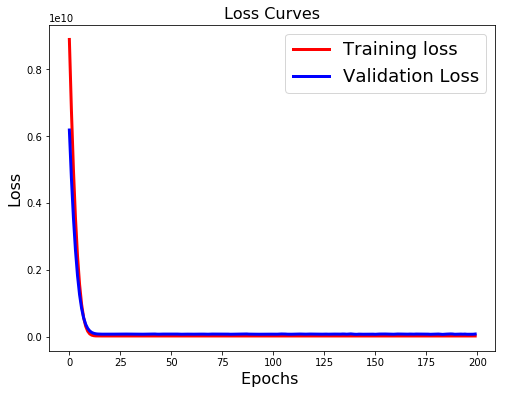

In [44]:
#Ploten der Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

In [45]:
# Modellperformance bewerten
trainScore = model.evaluate(trainX_46, train_y_46, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX_46, test_y_46, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 26383849.49 MSE (5136.52 RMSE)
Test Score: 84682320.00 MSE (9202.30 RMSE)


In [46]:
# Vorhersagen generieren
trainPredict_46 = model.predict(trainX_46)
testPredict_46 = model.predict(testX_46)

In [47]:
# Evaluation
test_MSE=mean_squared_error(test_y_46,testPredict_46)
train_MSE=mean_squared_error(train_y_46,trainPredict_46)

print(test_MSE,train_MSE)

84682319.33323939 26383848.658489205


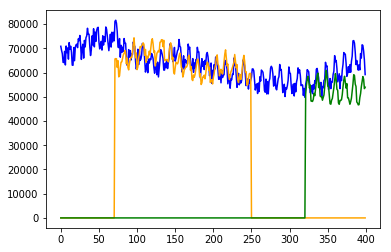

In [48]:
# Verschiebund der Trainingsvorhersage zum Plotten
trainPredictPlot = np.empty_like(ZR_46)
trainPredictPlot=trainPredictPlot.reshape(len(ZR_46))
trainPredictPlot[:]=[0]*len(ZR_46)
trainPredictPlot = trainPredictPlot.reshape(len(ZR_46),1)
trainPredictPlot[(look_back+look_forward-1):len(trainPredict_46)+(look_back+look_forward-1)] = trainPredict_46

# Verschiebung der Testvorhersage zum Plotten
testPredictPlot = np.empty_like(ZR_46)
testPredictPlot=testPredictPlot.reshape(len(ZR_46))
testPredictPlot[:]=[0]*len(ZR_46)
testPredictPlot = testPredictPlot.reshape(len(ZR_46),1)
testPredictPlot[len(trainPredict_46)+2*(look_back+look_forward-1):len(ZR_46)+1] = testPredict_46
 
# Plotten der baseline und  der Vorhersagen
plt.plot(ZR_46, color='blue')
plt.plot(trainPredictPlot, color='orange')
plt.plot(testPredictPlot, color='green')
plt.show()